In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tqdm import tqdm
import numpy as np


x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.40)

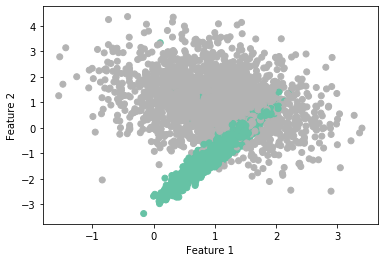

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="Set2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [28]:
from scipy.stats import randint as sp_randint

def RandomSearchCV(X_train, y_train, classifier, param_range, folds):
        
    train_scores = []
    test_scores = []
        
    for k_value in tqdm(params):
            
        train_scores_folds = []
        test_score_folds = []
            
        for i in range(0, folds):
                
            # Lengh of dataset for test
            data_lengh = int(len(X_train)/folds)
                
            # Getting test dataset's indices
            test_indices = list(set(list(range(data_lengh*i, data_lengh*(i+1)))))
            
            # Getting train dataset's indices
            train_indices = list(set(list(range(0, len(X_train)))) - set(test_indices))
                
            # Selecting the data for modelling
            X_train_new = X_train[train_indices]
            y_train_new = y_train[train_indices]
            
            X_test_new = X_train[test_indices]
            y_test_new = y_train[test_indices]
            
            # Modelling
            classifier.n_neighbors = k_value
            classifier.fit(X_train_new, y_train_new)
                
            # Predicting
            y_predicted = classifier.predict(X_test_new)
                
            # Check accuracy
                
            # For test data
            test_score_folds.append(accuracy_score(y_test_new, y_predicted))
            # For train data
            y_predicted = classifier.predict(X_train_new)
            train_scores_folds.append(accuracy_score(y_train_new, y_predicted))
                
        # Averaging accuracy score we got from 3 fold cross validation for a particular value of K
        train_scores.append(np.mean(np.array(train_scores_folds)))
        test_scores.append(np.mean(np.array(test_score_folds)))
        
    return train_scores, test_scores

K-values: [1, 4, 10, 18, 20, 22, 37, 40, 45, 48]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.67it/s]


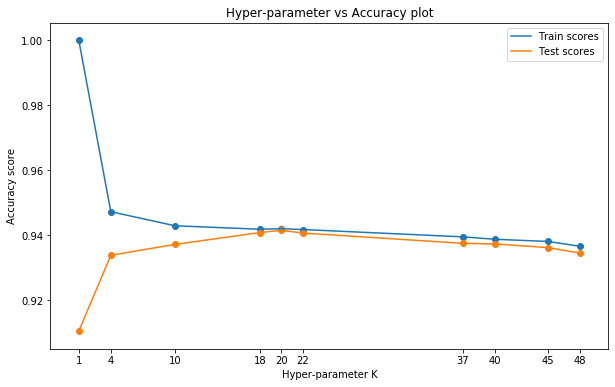

In [29]:
from sklearn.neighbors import KNeighborsClassifier

import random
import warnings
warnings.filterwarnings("ignore")

def get_K_values(low, high, size):
    
    # This values may contain duplicates, so getting only unique values, but we want 10 unique values so untill the size of
    # "param" set is not 10, we keep addding one value which is not in the set "param"
    params = set(sp_randint.rvs(low, high, size=size, random_state=0))
    
    while (len(params) != size):
        params.add(sp_randint.rvs(low, high))
    
    return sorted(params)

# Define the model
neigh = KNeighborsClassifier()

# Take hyper-parameter values of given model
params = get_K_values(1, 50, 10)
print("K-values:", params)

# Define the CV number
folds = 3

# Find the train accuracy scores and test accuracy score for 3-fold CV and given hyper-parameter
train_acc_score, test_acc_score = RandomSearchCV(X_train, y_train, neigh, params, folds)

# Plot the graph of hyper-parameter vs train accuracy, test accuracy

plt.figure(figsize=(10,6))

plt.plot(params, train_acc_score, label="Train scores")
plt.plot(params, test_acc_score, label="Test scores")

plt.scatter(params, train_acc_score)
plt.scatter(params, test_acc_score)

plt.title("Hyper-parameter vs Accuracy plot")
plt.xlabel("Hyper-parameter K")
plt.ylabel("Accuracy score")
plt.xticks(ticks=params, labels=params)
plt.legend()
plt.show()

In [30]:
# Source: Assignment_4_Reference notebook

def plot_decision_boundary(X1, X2, y, clf):
    
    # Create color maps
    cmap_light = ListedColormap(['#a4e0cd', '#dedcdc'])
    cmap_bold = ListedColormap(['#66C2A5', '#B3B3B3'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    
    # Plotting colormesh
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Ploting training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("2-Class classification (K = %i)" % (clf.n_neighbors))
    plt.show()

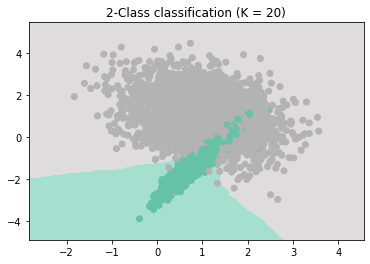

In [31]:
from matplotlib.colors import ListedColormap

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)

plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, model)